In [1]:
import numpy as np
import pandas as pd

import re

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
df_HC600_HYPERFIRE = pd.read_csv('exifdata_HC600_HYPERFIRE.csv')

#Remove Best of Folder

print(len(df_HC600_HYPERFIRE))
df_HC600_HYPERFIRE = df_HC600_HYPERFIRE[~df_HC600_HYPERFIRE['Directory'].str.contains("Best of CoE wildlife photos")]
print(len(df_HC600_HYPERFIRE))

def convertToInt(x):
    h = re.findall(r'\d+', x.split('_')[-1])
    if len(h) == 0:
        print(x)
    return int(h[0])

df_HC600_HYPERFIRE['image_number'] = df_HC600_HYPERFIRE['FileName'].apply(lambda x: convertToInt(x))

# df_HC600_HYPERFIRE['image_number'] = df_HC600_HYPERFIRE['FileName'].apply(lambda x: 
#                                                                           re.findall(r'\d+', x.split('_')[-1])[0])

print(len(df_HC600_HYPERFIRE))

df_ai_results = pd.read_csv('ml_results.csv')
print(len(df_ai_results))

1031491
1031465
1031465


/Users/usmanrizwan/.virtualenvs/RPA/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1203908


In [37]:
df_HC600_HYPERFIRE[df_HC600_HYPERFIRE['SourceFile'].str.contains('EDAL-D03-RAP1')]

,SourceFile,ExifToolVersion,FileName,Directory,FileSize,FileModifyDate,FileAccessDate,FileInodeChangeDate,FilePermissions,FileType,FileTypeExtension,MIMEType,ExifByteOrder,Make,Model,XResolution,YResolution,ResolutionUnit,ModifyDate,YCbCrPositioning,ExposureTime,ISO,ExifVersion,DateTimeOriginal,CreateDate,ComponentsConfiguration,Flash,MakerNoteVersion,FirmwareVersion,FirmwareDate,TriggerMode,Sequence,EventNumber,MoonPhase,AmbientTemperatureFahrenheit,AmbientTemperature,SerialNumber,Contrast,Brightness,Sharpness,Saturation,InfraredIlluminator,MotionSensitivity,BatteryVoltage,UserLabel,FlashpixVersion,ColorSpace,ExifImageWidth,ExifImageHeight,ExposureMode,WhiteBalance,SceneCaptureType,ImageWidth,ImageHeight,EncodingProcess,BitsPerSample,ColorComponents,YCbCrSubSampling,ImageSize,Megapixels,ShutterSpeed,image_number,file


In [36]:
df_HC600_HYPERFIRE[df_HC600_HYPERFIRE['SourceFile'].str.contains('EDAL-D03-RAP1')]

,SourceFile,ExifToolVersion,FileName,Directory,FileSize,FileModifyDate,FileAccessDate,FileInodeChangeDate,FilePermissions,FileType,FileTypeExtension,MIMEType,ExifByteOrder,Make,Model,XResolution,YResolution,ResolutionUnit,ModifyDate,YCbCrPositioning,ExposureTime,ISO,ExifVersion,DateTimeOriginal,CreateDate,ComponentsConfiguration,Flash,MakerNoteVersion,FirmwareVersion,FirmwareDate,TriggerMode,Sequence,EventNumber,MoonPhase,AmbientTemperatureFahrenheit,AmbientTemperature,SerialNumber,Contrast,Brightness,Sharpness,Saturation,InfraredIlluminator,MotionSensitivity,BatteryVoltage,UserLabel,FlashpixVersion,ColorSpace,ExifImageWidth,ExifImageHeight,ExposureMode,WhiteBalance,SceneCaptureType,ImageWidth,ImageHeight,EncodingProcess,BitsPerSample,ColorComponents,YCbCrSubSampling,ImageSize,Megapixels,ShutterSpeed,image_number,file


In [6]:
df_ai_results.head()

,file,max_detection_conf,detections,failure,person,animal,vehicle,empty,person_maxConf,animal_maxConf,vehicle_maxConf
0,BEHA-B02-DEN1 (Behavioural den #1)/SD#1 (JUN 2...,0.146,"[{'category': '1', 'conf': 0.146, 'bbox': [0.9...",NaN,0,1,0,0,0.000,0.146,0.0
1,BEHA-B02-DEN1 (Behavioural den #1)/SD#1 (JUN 2...,0.415,"[{'category': '1', 'conf': 0.415, 'bbox': [0.9...",NaN,0,1,0,0,0.000,0.415,0.0
2,BEHA-B02-DEN1 (Behavioural den #1)/SD#1 (JUN 2...,0.447,"[{'category': '1', 'conf': 0.447, 'bbox': [0.9...",NaN,0,1,0,0,0.000,0.447,0.0
3,BEHA-B02-DEN1 (Behavioural den #1)/SD#1 (JUN 2...,0.964,"[{'category': '1', 'conf': 0.964, 'bbox': [0.7...",NaN,1,1,0,0,0.398,0.964,0.0
4,BEHA-B02-DEN1 (Behavioural den #1)/SD#1 (JUN 2...,0.994,"[{'category': '2', 'conf': 0.994, 'bbox': [0.6...",NaN,1,0,0,0,0.994,0.000,0.0


In [7]:
df_HC600_HYPERFIRE['CreateDate'] = pd.to_datetime(df_HC600_HYPERFIRE['CreateDate'], 
                                                format='%Y:%m:%d %H:%M:%S')

In [8]:
df_HC600_HYPERFIRE['file'] = df_HC600_HYPERFIRE['SourceFile'].apply(lambda x: 
                                        '/'.join(x.split('/')[4:]))

In [9]:
df_HC600_HYPERFIRE.head()

,SourceFile,ExifToolVersion,FileName,Directory,FileSize,FileModifyDate,FileAccessDate,FileInodeChangeDate,FilePermissions,FileType,FileTypeExtension,MIMEType,ExifByteOrder,Make,Model,XResolution,YResolution,ResolutionUnit,ModifyDate,YCbCrPositioning,ExposureTime,ISO,ExifVersion,DateTimeOriginal,CreateDate,ComponentsConfiguration,Flash,MakerNoteVersion,FirmwareVersion,FirmwareDate,TriggerMode,Sequence,EventNumber,MoonPhase,AmbientTemperatureFahrenheit,AmbientTemperature,SerialNumber,Contrast,Brightness,Sharpness,Saturation,InfraredIlluminator,MotionSensitivity,BatteryVoltage,UserLabel,FlashpixVersion,ColorSpace,ExifImageWidth,ExifImageHeight,ExposureMode,WhiteBalance,SceneCaptureType,ImageWidth,ImageHeight,EncodingProcess,BitsPerSample,ColorComponents,YCbCrSubSampling,ImageSize,Megapixels,ShutterSpeed,image_number,file
0,/mnt/wildlife/wildlifemontoringprogram/BEHA-B0...,12.05,BEHAB02DEN1_D1_IMG_0001.JPG,/mnt/wildlife/wildlifemontoringprogram/BEHA-B0...,554 kB,2019:08:02 20:46:14-06:00,2019:08:02 20:46:14-06:00,2019:08:02 20:46:14-06:00,rwxrwxrwx,JPEG,jpg,image/jpeg,"Little-endian (Intel, II)",RECONYX,HC600 HYPERFIRE,72,72,inches,2018:06:29 15:31:52,Co-sited,1/30,800,220,2018:06:29 15:31:52,2018-06-29 15:31:52,"Y, Cb, Cr, -","Auto, Did not fire",0xf101,4.2.0,2016:12:29,Motion Detection,1 of 10,1,Full,83 F,28 C,H600HK07279531,128,0,64,154,Off,100,9.42 V,EDAL-B03-DEN1,100,sRGB,1920,1080,Auto,Manual,Standard,1920,1080,"Baseline DCT, Huffman coding",8,3,YCbCr4:2:2 (2 1),1920x1080,2.1,1/30,1,BEHA-B02-DEN1 (Behavioural den #1)/SD#1 (JUN 2...
1,/mnt/wildlife/wildlifemontoringprogram/BEHA-B0...,12.05,BEHAB02DEN1_D1_IMG_0002.JPG,/mnt/wildlife/wildlifemontoringprogram/BEHA-B0...,554 kB,2019:08:02 20:46:14-06:00,2019:08:02 20:46:14-06:00,2019:08:02 20:46:14-06:00,rwxrwxrwx,JPEG,jpg,image/jpeg,"Little-endian (Intel, II)",RECONYX,HC600 HYPERFIRE,72,72,inches,2018:06:29 15:31:54,Co-sited,1/30,800,220,2018:06:29 15:31:54,2018-06-29 15:31:54,"Y, Cb, Cr, -","Auto, Did not fire",0xf101,4.2.0,2016:12:29,Motion Detection,2 of 10,1,Full,83 F,28 C,H600HK07279531,128,0,64,154,Off,100,10.07 V,EDAL-B03-DEN1,100,sRGB,1920,1080,Auto,Manual,Standard,1920,1080,"Baseline DCT, Huffman coding",8,3,YCbCr4:2:2 (2 1),1920x1080,2.1,1/30,2,BEHA-B02-DEN1 (Behavioural den #1)/SD#1 (JUN 2...
2,/mnt/wildlife/wildlifemontoringprogram/BEHA-B0...,12.05,BEHAB02DEN1_D1_IMG_0003.JPG,/mnt/wildlife/wildlifemontoringprogram/BEHA-B0...,555 kB,2019:08:02 20:46:14-06:00,2019:08:02 20:46:14-06:00,2019:08:02 20:46:14-06:00,rwxrwxrwx,JPEG,jpg,image/jpeg,"Little-endian (Intel, II)",RECONYX,HC600 HYPERFIRE,72,72,inches,2018:06:29 15:31:54,Co-sited,1/30,800,220,2018:06:29 15:31:54,2018-06-29 15:31:54,"Y, Cb, Cr, -","Auto, Did not fire",0xf101,4.2.0,2016:12:29,Motion Detection,3 of 10,1,Full,83 F,28 C,H600HK07279531,128,0,64,154,Off,100,10.05 V,EDAL-B03-DEN1,100,sRGB,1920,1080,Auto,Manual,Standard,1920,1080,"Baseline DCT, Huffman coding",8,3,YCbCr4:2:2 (2 1),1920x1080,2.1,1/30,3,BEHA-B02-DEN1 (Behavioural den #1)/SD#1 (JUN 2...
3,/mnt/wildlife/wildlifemontoringprogram/BEHA-B0...,12.05,BEHAB02DEN1_D1_IMG_0004.JPG,/mnt/wildlife/wildlifemontoringprogram/BEHA-B0...,527 kB,2019:08:02 20:46:14-06:00,2019:08:02 20:46:14-06:00,2019:08:02 20:46:14-06:00,rwxrwxrwx,JPEG,jpg,image/jpeg,"Little-endian (Intel, II)",RECONYX,HC600 HYPERFIRE,72,72,inches,2018:06:29 15:31:55,Co-sited,1/30,800,220,2018:06:29 15:31:55,2018-06-29 15:31:55,"Y, Cb, Cr, -","Auto, Did not fire",0xf101,4.2.0,2016:12:29,Motion Detection,4 of 10,1,Full,83 F,28 C,H600HK07279531,128,0,64,154,Off,100,10.05 V,EDAL-B03-DEN1,100,sRGB,1920,1080,Auto,Manual,Standard,1920,1080,"Baseline DCT, Huffman coding",8,3,YCbCr4:2:2 (2 1),1920x1080,2.1,1/30,4,BEHA-B02-DEN1 (Behavioural den #1)/SD#1 (JUN 2...
4,/mnt/wildlife/wildlifemontoringprogram/BEHA-B0...,12.05,BEHAB02DEN1_D1_IMG_0005.JPG,/mnt/wildlife/wildlifemontoringprogram/BEHA-B0...,506 kB,2019:08:02 20:46:14-06:00,2019:08:02 20:46:14-06:00,2019:08:02 20:46:14-06:00,rwxrwxrwx,JPEG,jpg,image/j

In [10]:
df_ai_results.head()

,file,max_detection_conf,detections,failure,person,animal,vehicle,empty,person_maxConf,animal_maxConf,vehicle_maxConf
0,BEHA-B02-DEN1 (Behavioural den #1)/SD#1 (JUN 2...,0.146,"[{'category': '1', 'conf': 0.146, 'bbox': [0.9...",NaN,0,1,0,0,0.000,0.146,0.0
1,BEHA-B02-DEN1 (Behavioural den #1)/SD#1 (JUN 2...,0.415,"[{'category': '1', 'conf': 0.415, 'bbox': [0.9...",NaN,0,1,0,0,0.000,0.415,0.0
2,BEHA-B02-DEN1 (Behavioural den #1)/SD#1 (JUN 2...,0.447,"[{'category': '1', 'conf': 0.447, 'bbox': [0.9...",NaN,0,1,0,0,0.000,0.447,0.0
3,BEHA-B02-DEN1 (Behavioural den #1)/SD#1 (JUN 2...,0.964,"[{'category': '1', 'conf': 0.964, 'bbox': [0.7...",NaN,1,1,0,0,0.398,0.964,0.0
4,BEHA-B02-DEN1 (Behavioural den #1)/SD#1 (JUN 2...,0.994,"[{'category': '2', 'conf': 0.994, 'bbox': [0.6...",NaN,1,0,0,0,0.994,0.000,0.0


In [11]:
df_ai_w_metadta = df_HC600_HYPERFIRE.merge(df_ai_results, left_on='file', right_on='file', how='inner')

In [12]:
len(df_ai_w_metadta)

1022395

In [13]:
df_ai_w_metadta[df_ai_w_metadta['FileName'] == 'EDALC01RVM1_D2a_IMG_1021.JPG'].iloc[0]['detections']

"[{'category': '1', 'conf': 0.443, 'bbox': [0.6067, 0.5881, 0.08852, 0.04527]}, {'category': '1', 'conf': 0.124, 'bbox': [0.6023, 0.5868, 0.09806, 0.06888]}]"

In [14]:
print(len(df_ai_w_metadta[df_ai_w_metadta['person_maxConf'] >= 0.5]))

len(df_ai_w_metadta[df_ai_w_metadta['person_maxConf'] < 0.5])

131196


891199

# Remove non-trigerred images

In [15]:
df_ai_w_metadta.groupby('Sequence').size()

Sequence
0 of 0      330495
1 of 1         717
1 of 10       5629
1 of 3      211702
10 of 10      5604
2 of 10       5625
2 of 3      211663
3 of 10       5624
3 of 3      211641
4 of 10       5623
5 of 10       5623
6 of 10       5618
7 of 10       5613
8 of 10       5609
9 of 10       5609
dtype: int64

In [20]:
df_ai_w_metadta = df_ai_w_metadta[df_ai_w_metadta['Sequence'] != '0 of 0']

## Remove human images with confidence >= 0.5

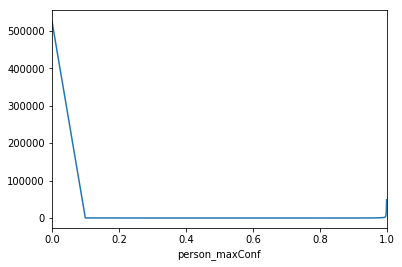

In [21]:
# df_ai_w_metadta['person_maxConf'].plot()

df_ai_w_metadta.groupby('person_maxConf').size().plot()

In [22]:
df_ai_w_metadta_nohuman = df_ai_w_metadta[
    (df_ai_w_metadta['person_maxConf'] < 0.5)]

In [35]:
df_ai_w_metadta_nohuman[df_ai_w_metadta_nohuman['SourceFile'].str.contains('EDAL-D03-RAP1')]

,SourceFile,ExifToolVersion,FileName,Directory,FileSize,FileModifyDate,FileAccessDate,FileInodeChangeDate,FilePermissions,FileType,FileTypeExtension,MIMEType,ExifByteOrder,Make,Model,XResolution,YResolution,ResolutionUnit,ModifyDate,YCbCrPositioning,ExposureTime,ISO,ExifVersion,DateTimeOriginal,CreateDate,ComponentsConfiguration,Flash,MakerNoteVersion,FirmwareVersion,FirmwareDate,TriggerMode,Sequence,EventNumber,MoonPhase,AmbientTemperatureFahrenheit,AmbientTemperature,SerialNumber,Contrast,Brightness,Sharpness,Saturation,InfraredIlluminator,MotionSensitivity,BatteryVoltage,UserLabel,FlashpixVersion,ColorSpace,ExifImageWidth,ExifImageHeight,ExposureMode,WhiteBalance,SceneCaptureType,ImageWidth,ImageHeight,EncodingProcess,BitsPerSample,ColorComponents,YCbCrSubSampling,ImageSize,Megapixels,ShutterSpeed,image_number,file,max_detection_conf,detections,failure,person,animal,vehicle,empty,person_maxConf,animal_maxConf,vehicle_maxConf


In [23]:
df_ai_w_metadta_nohuman.head()

,SourceFile,ExifToolVersion,FileName,Directory,FileSize,FileModifyDate,FileAccessDate,FileInodeChangeDate,FilePermissions,FileType,FileTypeExtension,MIMEType,ExifByteOrder,Make,Model,XResolution,YResolution,ResolutionUnit,ModifyDate,YCbCrPositioning,ExposureTime,ISO,ExifVersion,DateTimeOriginal,CreateDate,ComponentsConfiguration,Flash,MakerNoteVersion,FirmwareVersion,FirmwareDate,TriggerMode,Sequence,EventNumber,MoonPhase,AmbientTemperatureFahrenheit,AmbientTemperature,SerialNumber,Contrast,Brightness,Sharpness,Saturation,InfraredIlluminator,MotionSensitivity,BatteryVoltage,UserLabel,FlashpixVersion,ColorSpace,ExifImageWidth,ExifImageHeight,ExposureMode,WhiteBalance,SceneCaptureType,ImageWidth,ImageHeight,EncodingProcess,BitsPerSample,ColorComponents,YCbCrSubSampling,ImageSize,Megapixels,ShutterSpeed,image_number,file,max_detection_conf,detections,failure,person,animal,vehicle,empty,person_maxConf,animal_maxConf,vehicle_maxConf
0,/mnt/wildlife/wildlifemontoringprogram/BEHA-B0...,12.05,BEHAB02DEN1_D1_IMG_0001.JPG,/mnt/wildlife/wildlifemontoringprogram/BEHA-B0...,554 kB,2019:08:02 20:46:14-06:00,2019:08:02 20:46:14-06:00,2019:08:02 20:46:14-06:00,rwxrwxrwx,JPEG,jpg,image/jpeg,"Little-endian (Intel, II)",RECONYX,HC600 HYPERFIRE,72,72,inches,2018:06:29 15:31:52,Co-sited,1/30,800,220,2018:06:29 15:31:52,2018-06-29 15:31:52,"Y, Cb, Cr, -","Auto, Did not fire",0xf101,4.2.0,2016:12:29,Motion Detection,1 of 10,1,Full,83 F,28 C,H600HK07279531,128,0,64,154,Off,100,9.42 V,EDAL-B03-DEN1,100,sRGB,1920,1080,Auto,Manual,Standard,1920,1080,"Baseline DCT, Huffman coding",8,3,YCbCr4:2:2 (2 1),1920x1080,2.1,1/30,1,BEHA-B02-DEN1 (Behavioural den #1)/SD#1 (JUN 2...,0.146,"[{'category': '1', 'conf': 0.146, 'bbox': [0.9...",NaN,0,1,0,0,0.000,0.146,0.0
1,/mnt/wildlife/wildlifemontoringprogram/BEHA-B0...,12.05,BEHAB02DEN1_D1_IMG_0002.JPG,/mnt/wildlife/wildlifemontoringprogram/BEHA-B0...,554 kB,2019:08:02 20:46:14-06:00,2019:08:02 20:46:14-06:00,2019:08:02 20:46:14-06:00,rwxrwxrwx,JPEG,jpg,image/jpeg,"Little-endian (Intel, II)",RECONYX,HC600 HYPERFIRE,72,72,inches,2018:06:29 15:31:54,Co-sited,1/30,800,220,2018:06:29 15:31:54,2018-06-29 15:31:54,"Y, Cb, Cr, -","Auto, Did not fire",0xf101,4.2.0,2016:12:29,Motion Detection,2 of 10,1,Full,83 F,28 C,H600HK07279531,128,0,64,154,Off,100,10.07 V,EDAL-B03-DEN1,100,sRGB,1920,1080,Auto,Manual,Standard,1920,1080,"Baseline DCT, Huffman coding",8,3,YCbCr4:2:2 (2 1),1920x1080,2.1,1/30,2,BEHA-B02-DEN1 (Behavioural den #1)/SD#1 (JUN 2...,0.415,"[{'category': '1', 'conf': 0.415, 'bbox': [0.9...",NaN,0,1,0,0,0.000,0.415,0.0
2,/mnt/wildlife/wildlifemontoringprogram/BEHA-B0...,12.05,BEHAB02DEN1_D1_IMG_0003.JPG,/mnt/wildlife/wildlifemontoringprogram/BEHA-B0...,555 kB,2019:08:02 20:46:14-06:00,2019:08:02 20:46:14-06:00,2019:08:02 20:46:14-06:00,rwxrwxrwx,JPEG,jpg,image/jpeg,"Little-endian (Intel, II)",RECONYX,HC600 HYPERFIRE,72,72,inches,2018:06:29 15:31:54,Co-sited,1/30,800,220,2018:06:29 15:31:54,2018-06-29 15:31:54,"Y, Cb, Cr, -","Auto, Did not fire",0xf101,4.2.0,2016:12:29,Motion Detection,3 of 10,1,Full,83 F,28 C,H600HK07279531,128,0,64,154,Off,100,10.05 V,EDAL-B03-DEN1,100,sRGB,1920,1080,Auto,Manual,Standard,1920,1080,"Baseline DCT, Huffman coding",8,3,YCbCr4:2:2 (2 1),1920x1080,2.1,1/30,3,BEHA-B02-DEN1 (Behavioural den #1)/SD#1 (JUN 2...,0.447,"[{'category': '1', 'conf': 0.447, 'bbox': [0.9...",NaN,0,1,0,0,0.000,0.447,0.0
3,/mnt/wildlife/wildlifemontoringprogram/BEHA-B0...,12.05,BEHAB02DEN1_D1_IMG_0004.JPG,/mnt/wildlife/wildlifemontoringprogram/BEHA-B0...,527 kB,2019:08:02 20:46:14-06:00,2019:08:02 20:46:14-06:00,2019:08:02 20:46:14-06:00,rwxrwxrwx,JPEG,jpg,image/jpeg,"Little-endian (Intel, II)",RECONYX,HC600 HYPERFIRE,72,72,inches,2018:06:29 15:31:55,Co-sited,1/30,800,220,2018:06:29 15:31:55,2018-06-29 15:31:55,"Y, Cb, Cr, -","Auto, Did not fire",0xf101,4.2.0,2016:12:29,Motion Detection,4 of 10,1,Full,83 F,28 C,H600HK07279531,128,0,64,154,Off,100,10.05 V,EDAL-B03-DEN1,100,sRGB,1920,1080,Auto,Manual,Standard,1920,1080,

In [24]:
df_ai_w_metadta_nohuman['Sequence'].unique()

array(['1 of 10', '2 of 10', '3 of 10', '4 of 10', '6 of 10', '7 of 10',
       '8 of 10', '9 of 10', '10 of 10', '5 of 10', '1 of 3', '2 of 3',
       '3 of 3', '1 of 1'], dtype=object)

In [25]:
len(df_ai_w_metadta_nohuman)

563703

# Unique Directories

In [26]:
print(len(df_ai_w_metadta_nohuman['Directory'].unique()))

u = df_ai_w_metadta_nohuman['Directory'].unique()

u[0]

621


'/mnt/wildlife/wildlifemontoringprogram/BEHA-B02-DEN1 (Behavioural den #1)/SD#1 (JUN 29, 2018 - JUL 04, 2018)'

In [27]:
df_hold = df_ai_w_metadta_nohuman[df_ai_w_metadta_nohuman['Directory'] == '/mnt/wildlife/wildlifemontoringprogram/Best of CoE wildlife photos']
df_hold.sort_values(by=['CreateDate'], inplace=True)
df_hold.reset_index(drop=True, inplace=True)

# df_hold.loc[0]['Directory']

-c:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
df_no_human_animal_vehicle_sequence = pd.DataFrame(columns=df_ai_w_metadta_nohuman.columns)

for index, row in df_hold.iterrows():
    print(index)
    # check if animal confidence is > 0.5 or vehicle confidence is > 0.5
    if row['animal_maxConf'] > 0.5 or row['vehicle_maxConf'] > 0.5:
        # check the sequence
        if row['Sequence'] == '1 of 3':
            df_no_human_animal_vehicle_sequence = df_no_human_animal_vehicle_sequence.append(df_hold.loc[index])

            if df_hold.loc[index+1]['Sequence'] == '2 of 3':
                df_no_human_animal_vehicle_sequence = df_no_human_animal_vehicle_sequence.append(df_hold.loc[index+1])

            if df_hold.loc[index+2]['Sequence'] == '3 of 3':
                df_no_human_animal_vehicle_sequence = df_no_human_animal_vehicle_sequence.append(df_hold.loc[index+2])
        elif row['Sequence'] == '2 of 3':
            if df_hold.loc[index-1]['Sequence'] == '1 of 3':
                df_no_human_animal_vehicle_sequence = df_no_human_animal_vehicle_sequence.append(df_hold.loc[index-1])

            df_no_human_animal_vehicle_sequence = df_no_human_animal_vehicle_sequence.append(df_hold.loc[index])

            if df_hold.loc[index+1]['Sequence'] == '3 of 3':
                df_no_human_animal_vehicle_sequence = df_no_human_animal_vehicle_sequence.append(df_hold.loc[index+1])
        elif row['Sequence'] == '3 of 3':
            if df_hold.loc[index-2]['Sequence'] == '1 of 3':
                df_no_human_animal_vehicle_sequence = df_no_human_animal_vehicle_sequence.append(df_hold.loc[index-2])

            if df_hold.loc[index-1]['Sequence'] == '2 of 3':
                df_no_human_animal_vehicle_sequence = df_no_human_animal_vehicle_sequence.append(df_hold.loc[index-1])

            df_no_human_animal_vehicle_sequence = df_no_human_animal_vehicle_sequence.append(df_hold.loc[index])
        else:
            df_no_human_animal_vehicle_sequence = df_no_human_animal_vehicle_sequence.append(df_hold.loc[index])



In [29]:
done = []
total = 0

df_no_human_animal_vehicle_sequence = pd.DataFrame(columns=df_ai_w_metadta_nohuman.columns)

In [30]:
# df_no_human_animal_vehicle_sequence.head()

for u in df_ai_w_metadta_nohuman['Directory'].unique():
    if u not in done:
        print(u)
        df_hold = df_ai_w_metadta_nohuman[df_ai_w_metadta_nohuman['Directory'] == u]
        df_hold.sort_values(by=['CreateDate', 'Sequence'], inplace=True)
        df_hold.reset_index(drop=True, inplace=True)
        max_index = max(df_hold.index)
        min_index = min(df_hold.index)
        print(len(df_hold))
        total+=len(df_hold)
        print('total: ', total)

        df_hold_2 = pd.DataFrame(columns=df_ai_w_metadta_nohuman.columns)

        for index, row in df_hold.iterrows():
            # check if animal confidence is > 0.5 or vehicle confidence is > 0.5
            if row['animal_maxConf'] > 0.5 or row['vehicle_maxConf'] > 0.5:
                # check the sequence
                if row['Sequence'] == '1 of 3':
                    df_hold_2 = df_hold_2.append(df_hold.loc[index])

                    # check index + 1 exists
                    if index+1 <= max_index:
                        # make sure the next image is the next image in the sequence and numbering
                        if df_hold.loc[index+1]['Sequence'] == '2 of 3' and df_hold.loc[index+1]['image_number'] == row['image_number'] + 1:
                            df_hold_2 = df_hold_2.append(df_hold.loc[index+1])

                    if index+2 <= max_index:
                        if df_hold.loc[index+2]['Sequence'] == '3 of 3' and df_hold.loc[index+2]['image_number'] == row['image_number'] + 2:
                            df_hold_2 = df_hold_2.append(df_hold.loc[index+2])
                elif row['Sequence'] == '2 of 3':
                    if index-1 >= min_index:
                        if df_hold.loc[index-1]['Sequence'] == '1 of 3' and df_hold.loc[index-1]['image_number'] == row['image_number'] - 1:
                            df_hold_2 = df_hold_2.append(df_hold.loc[index-1])

                    df_hold_2 = df_hold_2.append(df_hold.loc[index])

                    if index+1 <= max_index:
                        if df_hold.loc[index+1]['Sequence'] == '3 of 3' and df_hold.loc[index+1]['image_number'] == row['image_number'] + 1:
                            df_hold_2 = df_hold_2.append(df_hold.loc[index+1])
                elif row['Sequence'] == '3 of 3':
                    if index-2 >= min_index:
                        if df_hold.loc[index-2]['Sequence'] == '1 of 3' and df_hold.loc[index-2]['image_number'] == row['image_number'] - 2:
                            df_hold_2 = df_hold_2.append(df_hold.loc[index-2])

                    if index-1 >= min_index:
                        if df_hold.loc[index-1]['Sequence'] == '2 of 3' and df_hold.loc[index-1]['image_number'] == row['image_number'] - 1:
                            df_hold_2 = df_hold_2.append(df_hold.loc[index-1])

                    df_hold_2 = df_hold_2.append(df_hold.loc[index])
                else:
                    df_hold_2 = df_hold_2.append(df_hold.loc[index])
                    
        df_hold_2.drop_duplicates(inplace=True)
        df_no_human_animal_vehicle_sequence = df_no_human_animal_vehicle_sequence.append(df_hold_2)

        done.append(u)


/mnt/wildlife/wildlifemontoringprogram/BEHA-B02-DEN1 (Behavioural den #1)/SD#1 (JUN 29, 2018 - JUL 04, 2018)
272
total:  272


-c:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/mnt/wildlife/wildlifemontoringprogram/BEHA-B02-DEN1 (Behavioural den #1)/SD#2 (JUL 04, 2018 - JUL 09, 2018)
76
total:  348
/mnt/wildlife/wildlifemontoringprogram/BEHA-B02-DEN1 (Behavioural den #1)/SD#3 (JUL 09, 2018 - JUL 17, 2018)
85
total:  433
/mnt/wildlife/wildlifemontoringprogram/BEHA-B02-DEN1 (Behavioural den #1)/SD#4 (JUL 17, 2018 - JUL 25, 2018)
40
total:  473
/mnt/wildlife/wildlifemontoringprogram/BEHA-B02-DEN1 (Behavioural den #1)/SD#5 (JUL 25, 2018 - JUL 31, 2018)
62
total:  535
/mnt/wildlife/wildlifemontoringprogram/BEHA-B02-DEN1 (Behavioural den #1)/SD#6 (JUL 31, 2018 - AUG 15, 2018)
90
total:  625
/mnt/wildlife/wildlifemontoringprogram/BEHA-B02-DEN1 (Behavioural den #1)/SD#7 (AUG 15, 2019 - SEP 29, 2019)
417
total:  1042
/mnt/wildlife/wildlifemontoringprogram/BEHA-B02-DEN2 (Behavioural Den #2)/SD#1 (JUL 17, 2019 - JUL 25, 2018)
110
total:  1152
/mnt/wildlife/wildlifemontoringprogram/BEHA-B02-DEN2 (Behavioural Den #2)/SD#2 (JUL 25, 2018 - JUL 31, 2018)
214
total:  1366
/m

/mnt/wildlife/wildlifemontoringprogram/EDAL-A01-VIP1 (Virginia park)/SD#3 (SEP 24, 2019 - DEC 29, 2019)
619
total:  39274
/mnt/wildlife/wildlifemontoringprogram/EDAL-A02-ABB1 (Abottsfield)/SD#1 (MAY 23, 2018 - JUN 27, 2018)
117
total:  39391
/mnt/wildlife/wildlifemontoringprogram/EDAL-A02-ABB1 (Abottsfield)/SD#2 (JUN 27, 2018 - AUG 02, 2018)
118
total:  39509
/mnt/wildlife/wildlifemontoringprogram/EDAL-A02-BDP1 (Belgravia Dog Park)/SD#2 (MAR 30, 2019 - JUN 25, 2019)
892
total:  40401
/mnt/wildlife/wildlifemontoringprogram/EDAL-A02-BDP1 (Belgravia Dog Park)/SD#6 (DEC 17, 2019 - MAR 31, 2020)
1443
total:  41844
/mnt/wildlife/wildlifemontoringprogram/EDAL-A02-BEL1 (Belvedere)/SD#1 (MAY 24, 2018 - JUN 28, 2018)
733
total:  42577
/mnt/wildlife/wildlifemontoringprogram/EDAL-A02-BEL1 (Belvedere)/SD#2 (JUN 28, 2018 - AUG 01, 2018)
263
total:  42840
/mnt/wildlife/wildlifemontoringprogram/EDAL-A02-BEL1 (Belvedere)/SD#3 (SEP 29, 2018 - DEC 29, 2018)
2869
total:  45709
/mnt/wildlife/wildlifemontor

/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#3 (AUG 07, 2018 - SEP 24, 2018)
211
total:  94482
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH2 (Horse Hill 2)/SD#1 (AUG 07, 2018 - SEP 24, 2018)
60
total:  94542
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-RST1 (Rural South Sturgeon)/SD#1 (JUN 18, 2019 - JUN 26, 2019)
55
total:  94597
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-RST1 (Rural South Sturgeon)/SD#2 (JUN 26, 2019 - AUG 06, 2019)
101
total:  94698
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-RST1 (Rural South Sturgeon)/SD#3 (AUG 06, 2019 - SEP 30, 2019)
127
total:  94825
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-RST1 (Rural South Sturgeon)/SD#4 (SEP 30, 2019 - DEC 12, 2019)
708
total:  95533
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-SST1 (South Sturgeon)/SD#1 (JUN 05, 2018 - AUG 07, 2018)
92
total:  95625
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-SST2 (South Sturgeon)/SD#1 (AUG 07, 2018 - SEP 24, 2018)
228
total:  95853

/mnt/wildlife/wildlifemontoringprogram/EDAL-B02-MIG1 (Millwoods Golf Course)/SD#8 (AUG 4, 2019 - SEP 27, 2019)
244
total:  172650
/mnt/wildlife/wildlifemontoringprogram/EDAL-B02-MIG1 (Millwoods Golf Course)/SD#9 (SEP 27, 2019 - DEC 16, 2019)
15
total:  172665
/mnt/wildlife/wildlifemontoringprogram/EDAL-B02-PYI1 (Pylypow Industrial)/SD#1 (MAY 24, 2018 - JUN 22, 2018)
32
total:  172697
/mnt/wildlife/wildlifemontoringprogram/EDAL-B02-PYI1 (Pylypow Industrial)/SD#10 (DEC 11, 2019 - APR 09, 2020)
906
total:  173603
/mnt/wildlife/wildlifemontoringprogram/EDAL-B02-PYI1 (Pylypow Industrial)/SD#11 (APR 9, 2020 - AUG 3, 2020)
834
total:  174437
/mnt/wildlife/wildlifemontoringprogram/EDAL-B02-PYI1 (Pylypow Industrial)/SD#2 (JUN 22, 2018 - AUG 01, 2018)
264
total:  174701
/mnt/wildlife/wildlifemontoringprogram/EDAL-B02-PYI1 (Pylypow Industrial)/SD#3 (AUG 01, 2018 - SEP 29, 2018)
209
total:  174910
/mnt/wildlife/wildlifemontoringprogram/EDAL-B02-PYI1 (Pylypow Industrial)/SD#4 (SEP 29, 2018 - DEC 28

/mnt/wildlife/wildlifemontoringprogram/EDAL-C01-BUE1 (Buena Vista 1)/SD#3 (JUN 28, 2019 - AUG 07, 2019)
251
total:  252076
/mnt/wildlife/wildlifemontoringprogram/EDAL-C01-BUE1 (Buena Vista 1)/SD#4 (AUG 07, 2019 - OCT 04, 2019)
198
total:  252274
/mnt/wildlife/wildlifemontoringprogram/EDAL-C01-BUE1 (Buena Vista 1)/SD#5 (OCT 04, 2019 - DEC 18, 2019)
564
total:  252838
/mnt/wildlife/wildlifemontoringprogram/EDAL-C01-BUE1 (Buena Vista 1)/SD#6 (DEC 18, 2019 - APR 4, 2020)
1566
total:  254404
/mnt/wildlife/wildlifemontoringprogram/EDAL-C01-BUE1 (Buena Vista 1)/SD#7 (APR 4, 2020 - AUG 6, 2020)
548
total:  254952
/mnt/wildlife/wildlifemontoringprogram/EDAL-C01-BUE1 (Buena Vista Park)/SD#2 (MAR 31, 2019 - JUN 28, 2019)
6471
total:  261423
/mnt/wildlife/wildlifemontoringprogram/EDAL-C01-HAW1 (Hawrelak 1)/SD#1 (MAY 15, 2018 - JUN 13, 2018)
444
total:  261867
/mnt/wildlife/wildlifemontoringprogram/EDAL-C01-HAW1 (Hawrelak 1)/SD#2 (JUN 13, 2018 - JUN 20, 2018)
11
total:  261878
/mnt/wildlife/wildlif

/mnt/wildlife/wildlifemontoringprogram/EDAL-C01-UNF1 (University Farms)/SD#1 (JUN 12, 2018 - JUN 21, 2018)
51
total:  355256
/mnt/wildlife/wildlifemontoringprogram/EDAL-C01-UNF1 (University Farms)/SD#10 (DEC 17, 2019 - FEB 27, 2020)
45
total:  355301
/mnt/wildlife/wildlifemontoringprogram/EDAL-C01-UNF1 (University Farms)/SD#12 (APR 20, 2020 - AUG 3, 2020)
2831
total:  358132
/mnt/wildlife/wildlifemontoringprogram/EDAL-C01-UNF1 (University Farms)/SD#2 (JUN 27, 2018 - AUG 01, 2018)
189
total:  358321
/mnt/wildlife/wildlifemontoringprogram/EDAL-C01-UNF1 (University Farms)/SD#3 (AUG 02, 2018 - SEP 29, 2018)
659
total:  358980
/mnt/wildlife/wildlifemontoringprogram/EDAL-C01-UNF1 (University Farms)/SD#4 (SEP 30, 2018 - DEC 29, 2018)
287
total:  359267
/mnt/wildlife/wildlifemontoringprogram/EDAL-C01-UNF1 (University Farms)/SD#5 (DEC 29, 2018 - MAR 31, 2019)
270
total:  359537
/mnt/wildlife/wildlifemontoringprogram/EDAL-C01-UNF1 (University Farms)/SD#6 (MAR 31 -2019 - JUN 28, 2019)
158
total: 

/mnt/wildlife/wildlifemontoringprogram/EDAL-C02-ZOO1 (Zoo1)/SD#1 (MAY 29, 2018 - JUN 07, 2018)
60
total:  374481
/mnt/wildlife/wildlifemontoringprogram/EDAL-C02-ZOO1 (Zoo1)/SD#2 (JUN 07, 2018 - JUL 04, 2018)
474
total:  374955
/mnt/wildlife/wildlifemontoringprogram/EDAL-C02-ZOO1 (Zoo1)/SD#3 (JUL 04, 2018 - JUL 11, 2018)
543
total:  375498
/mnt/wildlife/wildlifemontoringprogram/EDAL-C02-ZOO1 (Zoo1)/SD#4 (JUL 11, 2018 - JUL 24, 2018)
505
total:  376003
/mnt/wildlife/wildlifemontoringprogram/EDAL-C02-ZOO1 (Zoo1)/SD#5 (JUL 25, 2018 - AUG 15, 2018)
2159
total:  378162
/mnt/wildlife/wildlifemontoringprogram/EDAL-C02-ZOO1 (Zoo1)/SD#6 (AUG 15, 2018 - SEP 28, 2018)
1199
total:  379361
/mnt/wildlife/wildlifemontoringprogram/EDAL-C02-ZOO2 (Zoo2)/SD#1 (DEC 29, 2018 - MAR 31, 2019)
1240
total:  380601
/mnt/wildlife/wildlifemontoringprogram/EDAL-C02-ZOO2 (Zoo2)/SD#2 (MAR 31, 2019 - JUN 28, 2019)
505
total:  381106
/mnt/wildlife/wildlifemontoringprogram/EDAL-C02-ZOO2 (Zoo2)/SD#3 (JUN 28, 2019 - AUG 0

/mnt/wildlife/wildlifemontoringprogram/EDAL-C03-MAH1 (Magrath heights)/SD#3 (Aug 02, 2018 - Sep 25, 2018)
88
total:  447520
/mnt/wildlife/wildlifemontoringprogram/EDAL-C03-MAH1 (Magrath heights)/SD#4 (Sep 25, 2018 - Dec 18, 2018)
384
total:  447904
/mnt/wildlife/wildlifemontoringprogram/EDAL-C03-MAH1 (Magrath heights)/SD#5 (DEC 18, 2018 - MAR 28, 2019)
656
total:  448560
/mnt/wildlife/wildlifemontoringprogram/EDAL-C03-MAH1 (Magrath heights)/SD#6 (MAR 28, 2019 - JUN 27, 2019)
65
total:  448625
/mnt/wildlife/wildlifemontoringprogram/EDAL-C03-MAH1 (Magrath heights)/SD#7 (JUN 27, 2019 - AUG 07, 2019)
9
total:  448634
/mnt/wildlife/wildlifemontoringprogram/EDAL-C03-MAH1 (Magrath heights)/SD#8 (AUG 07, 2019 - SEP 27, 2019)
118
total:  448752
/mnt/wildlife/wildlifemontoringprogram/EDAL-C03-MAH1 (Magrath heights)/SD#9 (SEP 27, 2019 - DEC 12, 2019)
78
total:  448830
/mnt/wildlife/wildlifemontoringprogram/EDAL-C03-MAR4 (Mackinnon Ravine 4)/SD#1 (DEC 29, 2018 - MAR 29, 2019)
48
total:  448878
/mn

/mnt/wildlife/wildlifemontoringprogram/EDAL-D01-ING1 (Inglewood)/SD#4 (AUG 06, 2019 - SEP 26, 2019)
710
total:  490035
/mnt/wildlife/wildlifemontoringprogram/EDAL-D01-ING1 (Inglewood)/SD#6 (DEC 18, 2020 - APR 4, 2020)
2693
total:  492728
/mnt/wildlife/wildlifemontoringprogram/EDAL-D01-MCQ1 (McQueen)/SD#1 (DEC 31, 2018 - MAR 31, 2019)
2142
total:  494870
/mnt/wildlife/wildlifemontoringprogram/EDAL-D01-MCQ1 (McQueen)/SD#2 (APR 03, 2019 - JUN 28, 2019)/100RECNX
42
total:  494912
/mnt/wildlife/wildlifemontoringprogram/EDAL-D01-MCQ1 (McQueen)/SD#3 (JUN 28, 2019 - JUL 02, 2019)
9157
total:  504069
/mnt/wildlife/wildlifemontoringprogram/EDAL-D01-MCQ1 (McQueen)/SD#4 (JUL 02, 2019 - JUL 04, 2019)
8203
total:  512272
/mnt/wildlife/wildlifemontoringprogram/EDAL-D01-PRC1 (Prince Charles)/SD#1 (MAY 31, 2018 - JUN 25, 2018)
1467
total:  513739
/mnt/wildlife/wildlifemontoringprogram/EDAL-D01-PRC1 (Prince Charles)/SD#2 (JUN 25, 2018 - JUL 19, 2018)
2606
total:  516345
/mnt/wildlife/wildlifemontoringpr

/mnt/wildlife/wildlifemontoringprogram/EDAL-D03-HAP1 (Hawks pass 1)/SD#1 (MAY 15, 2018 - JUN 28, 2018)
473
total:  556273
/mnt/wildlife/wildlifemontoringprogram/EDAL-D03-HAP1 (Hawks pass 1)/SD#2 (JUN 28, 2018 - AUG 01, 2018)
107
total:  556380
/mnt/wildlife/wildlifemontoringprogram/EDAL-D03-HAP1 (Hawks pass 1)/SD#3 (AUG 01, 2018 - SEP 24, 2018)
126
total:  556506
/mnt/wildlife/wildlifemontoringprogram/EDAL-D03-HAP1 (Hawks pass 1)/SD#4 (SEP 24, 2018 - NOV 09, 2018)
610
total:  557116
/mnt/wildlife/wildlifemontoringprogram/EDAL-D03-HAP2 (Hawks pass 2 passage)/SD#1 (MAY 30, 2018 - JUN 28, 2018)
149
total:  557265
/mnt/wildlife/wildlifemontoringprogram/EDAL-D03-HAP2 (Hawks pass 2 passage)/SD#2 (JUN 28, 2018 - AUG 01, 2018)
285
total:  557550
/mnt/wildlife/wildlifemontoringprogram/EDAL-D03-HAP2 (Hawks pass 2 passage)/SD#4 (SEP 24, 2018 - NOV 09, 2018)
431
total:  557981
/mnt/wildlife/wildlifemontoringprogram/EDAL-D03-HAP2 (Hawks pass 2 passage)/SD#5 (NOV 09, 2018 - DEC 18,2018)
331
total:  

In [31]:
len(df_no_human_animal_vehicle_sequence)

287923

In [32]:
df_no_human_animal_vehicle_sequence[100000:100005][['FileName', 'Sequence']]

,FileName,Sequence
44,EDALB02PYI1_D3_IMG_0369.JPG,3 of 3
45,EDALB02PYI1_D3_IMG_0383.JPG,1 of 3
46,EDALB02PYI1_D3_IMG_0384.JPG,2 of 3
47,EDALB02PYI1_D3_IMG_0385.JPG,3 of 3
48,EDALB02PYI1_D3_IMG_0407.JPG,1 of 3


In [33]:
len(df_no_human_animal_vehicle_sequence)

287923

In [34]:
df_no_human_animal_vehicle_sequence[['file', 'FileName', 'Sequence']].to_csv(
    'images_to_transfer_to_nonhuman.csv', mode='a', header=False, index=False)

In [45]:
df_no_human_animal_vehicle_sequence[(df_no_human_animal_vehicle_sequence.vehicle_maxConf < 0.5) & 
                                   (df_no_human_animal_vehicle_sequence.animal_maxConf < 0.5)]

,SourceFile,ExifToolVersion,FileName,Directory,FileSize,FileModifyDate,FileAccessDate,FileInodeChangeDate,FilePermissions,FileType,FileTypeExtension,MIMEType,ExifByteOrder,Make,Model,XResolution,YResolution,ResolutionUnit,ModifyDate,YCbCrPositioning,ExposureTime,ISO,ExifVersion,DateTimeOriginal,CreateDate,ComponentsConfiguration,Flash,MakerNoteVersion,FirmwareVersion,FirmwareDate,TriggerMode,Sequence,EventNumber,MoonPhase,AmbientTemperatureFahrenheit,AmbientTemperature,SerialNumber,Contrast,Brightness,Sharpness,Saturation,InfraredIlluminator,MotionSensitivity,BatteryVoltage,UserLabel,FlashpixVersion,ColorSpace,ExifImageWidth,ExifImageHeight,ExposureMode,WhiteBalance,SceneCaptureType,ImageWidth,ImageHeight,EncodingProcess,BitsPerSample,ColorComponents,YCbCrSubSampling,ImageSize,Megapixels,ShutterSpeed,image_number,file,max_detection_conf,detections,failure,person,animal,vehicle,empty,person_maxConf,animal_maxConf,vehicle_maxConf
7,/mnt/wildlife/wildlifemontoringprogram/EDAL-A0...,12.05,EDALA01FUP1_D1_IMG_0009.JPG,/mnt/wildlife/wildlifemontoringprogram/EDAL-A0...,626 kB,2019:08:02 10:46:41-06:00,2019:08:02 10:46:41-06:00,2019:08:02 10:46:41-06:00,rwxrwxrwx,JPEG,jpg,image/jpeg,"Little-endian (Intel, II)",RECONYX,PC900 PROFESSIONAL,72,72,inches,2018:05:22 11:58:02,Co-sited,1/120,80,220,2018:05:22 11:58:02,2018-05-22 11:58:02,"Y, Cb, Cr, -","Auto, Did not fire",0xf101,4.1.0,2014:02:13,Motion Detection,2 of 3,3,First Quarter,76 F,24 C,P900HG04178359,128,0,74,154,Off,100,10.47 V,EDAL-A01-FUP1,100,sRGB,2048,1536,Auto,Manual,Standard,2048,1536,"Baseline DCT, Huffman coding",8,3,YCbCr4:2:2 (2 1),2048x1536,3.1,1/120,9,"EDAL-A01-FUP1 (Fulton Place)/SD#1 (MAY 22, 201...",0.0,[],NaN,0,0,0,1,0.0,0.0,0.0
8,/mnt/wildlife/wildlifemontoringprogram/EDAL-A0...,12.05,EDALA01FUP1_D1_IMG_0010.JPG,/mnt/wildlife/wildlifemontoringprogram/EDAL-A0...,627 kB,2019:08:02 10:46:41-06:00,2019:08:02 10:46:41-06:00,2019:08:02 10:46:41-06:00,rwxrwxrwx,JPEG,jpg,image/jpeg,"Little-endian (Intel, II)",RECONYX,PC900 PROFESSIONAL,72,72,inches,2018:05:22 11:58:03,Co-sited,1/120,80,220,2018:05:22 11:58:03,2018-05-22 11:58:03,"Y, Cb, Cr, -","Auto, Did not fire",0xf101,4.1.0,2014:02:13,Motion Detection,3 of 3,3,First Quarter,76 F,24 C,P900HG04178359,128,0,74,154,Off,100,10.47 V,EDAL-A01-FUP1,100,sRGB,2048,1536,Auto,Manual,Standard,2048,1536,"Baseline DCT, Huffman coding",8,3,YCbCr4:2:2 (2 1),2048x1536,3.1,1/120,10,"EDAL-A01-FUP1 (Fulton Place)/SD#1 (MAY 22, 201...",0.0,[],NaN,0,0,0,1,0.0,0.0,0.0
10,/mnt/wildlife/wildlifemontoringprogram/EDAL-A0...,12.05,EDALA01FUP1_D1_IMG_0013.JPG,/mnt/wildlife/wildlifemontoringprogram/EDAL-A0...,631 kB,2019:08:02 10:46:41-06:00,2019:08:02 10:46:41-06:00,2019:08:02 10:46:41-06:00,rwxrwxrwx,JPEG,jpg,image/jpeg,"Little-endian (Intel, II)",RECONYX,PC900 PROFESSIONAL,72,72,inches,2018:05:22 12:10:49,Co-sited,1/120,64,220,2018:05:22 12:10:49,2018-05-22 12:10:49,"Y, Cb, Cr, -","Auto, Did not fire",0xf101,4.1.0,2014:02:13,Motion Detection,2 of 3,4,First Quarter,76 F,24 C,P900HG04178359,128,0,74,154,Off,100,10.47 V,EDAL-A01-FUP1,100,sRGB,2048,1536,Auto,Manual,Standard,2048,1536,"Baseline DCT, Huffman coding",8,3,YCbCr4:2:2 (2 1),2048x1536,3.1,1/120,13,"EDAL-A01-FUP1 (Fulton Place)/SD#1 (MAY 22, 201...",0.0,[],NaN,0,0,0,1,0.0,0.0,0.0
11,/mnt/wildlife/wildlifemontoringprogram/EDAL-A0...,12.05,EDALA01FUP1_D1_IMG_0014.JPG,/mnt/wildlife/wildlifemontoringprogram/EDAL-A0...,631 kB,2019:08:02 10:46:42-06:00,2019:08:02 10:46:42-06:00,2019:08:02 10:46:42-06:00,rwxrwxrwx,JPEG,jpg,image/jpeg,"Little-endian (Intel, II)",RECONYX,PC900 PROFESSIONAL,72,72,inches,2018:05:22 12:10:50,Co-sited,1/120,64,220,2018:05:22 12:10:50,2018-05-22 12:10:50,"Y, Cb, Cr, -","Auto, Did not fire",0xf101,4.1.0,2014:02:13,Motion Detection,3 of 3,4,First Quarter,76 F,24 C,P900HG04178359,128,0,74,154,Off,100,10.47 V,EDAL-A01-FUP1,100,sRGB,2048,1536,Auto,Manual,Standard,2048,1536,"Baseline DCT, Huffman coding",8,3,YCbCr4:2:2 (2 1),2048x1536,3.1,1/120,14,"EDAL-A01-FUP1 (Fulton Place)/SD

In [48]:
167629 + 31768 + 3161

202558

In [33]:
df = pd.read_csv('images_to_transfer_to_nonhuman.csv')

In [34]:
len(df)

202558